In [82]:
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [53]:
def read_dataframe(filename):
    data = pd.read_parquet(f"/home/codespace/dataset/{filename}")
    data.lpep_dropoff_datetime = pd.to_datetime(data.lpep_dropoff_datetime)
    data.lpep_pickup_datetime = pd.to_datetime(data.lpep_pickup_datetime)
    data["duration"] = data.lpep_dropoff_datetime - data.lpep_pickup_datetime
    data.duration = data.duration.apply(lambda x: x.total_seconds()/60)
    data = data[(df.duration>=1)& (data.duration<=60)]
    categorical = ['PULocationID', 'DOLocationID']
    data[categorical] = data[categorical].astype(str)
    return data

In [31]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    1736.000000
mean       13.225931
std        73.049482
min         0.000000
50%         1.708333
95%        37.358333
98%        52.145000
99%        65.337500
max      1438.983333
Name: duration, dtype: float64

In [55]:
df_train = read_dataframe("green_tripdata_2024-01.parquet")
df_val = read_dataframe("green_tripdata_2024-02.parquet")

In [74]:
df_train ["PU_DO"] = df_train['PULocationID'] + "_" + df_train['DOLocationID']
df_val ["PU_DO"] = df_val['PULocationID'] + "_" + df_val['DOLocationID']

In [77]:
numerical = ["trip_distance"]
#categorical = ['PULocationID', 'DOLocationID']
categorical = ['PU_DO']
dv = DictVectorizer()

train_dicts = df_train[categorical+numerical].to_dict(orient="records")
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical+numerical].to_dict(orient="records")
X_val = dv.transform(val_dicts)


In [78]:
lr = LinearRegression()
lr.fit(X_train, y_train)
target = "duration"
y_train = df_train[target].values
y_val = df_val[target].values
y_pred = lr.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


10.969890388002392

/tmp/ipykernel_2979/1505421196.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_2979/1505421196.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


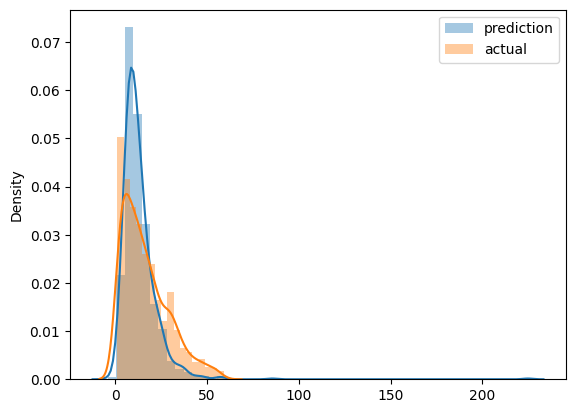

In [79]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')
plt.legend()

In [81]:
lr = Lasso(alpha=0.05)
lr.fit(X_train, y_train)
target = "duration"
y_train = df_train[target].values
y_val = df_val[target].values
y_pred = lr.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


8.790693269302077

In [84]:
with open("/home/codespace/models/lin_reg.bin", "wb") as f_out:
    pickle.dump((dv, lr), f_out)